In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
            n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

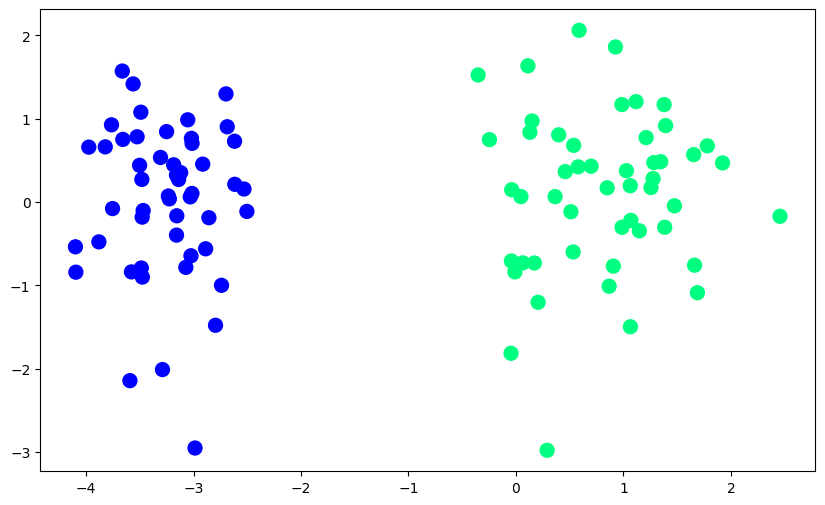

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.show()

In [168]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X, y)
# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [169]:
print(lor.coef_)
print(lor.intercept_)

[[4.91945245 0.24158743]]
[5.86360737]


In [170]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [171]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

In [209]:
def sigmoid(num):
    return 1/(1+np.exp(-num))
def gradient_descent(x,y_):
    # Insert a column with ones at the start.
    x = np.insert(x, 0, 1, axis=1)
    # Initialize weights array of size of input columns.
    weights = np.ones(x.shape[1])
    lr = 0.5

    for i in range(2500):
        # Equations that has been derived after calculating gradient of Binary Cross Entropy
        # Loss Function
        y_hat = sigmoid(np.dot(x, weights))
        weights = weights + lr*(np.dot((y_-y_hat), x)/x.shape[0])
    return weights[1:], weights[0]

In [210]:
coef_, intercept_ = gradient_descent(X, y)

In [211]:
m = -(coef_[0] / coef_[1])
b = -(intercept_/coef_[1])

In [212]:
x_input_1 = np.linspace(-3, 3, 100)
y_input_1 = m*x_input_1 + b

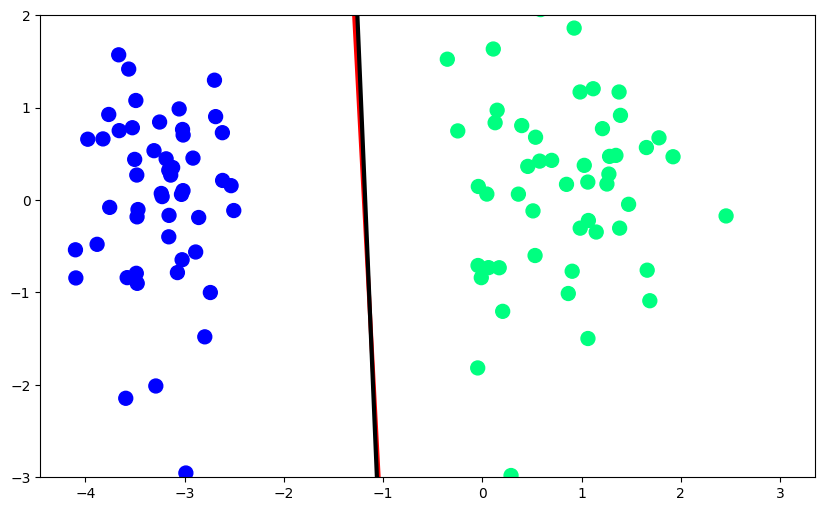

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input_1, y_input_1, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()